In [2]:
%matplotlib notebook

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
df

,ID,labels_0_3,labels_0_4
0,Ag_HfO2_cat_3.125_222_m,m,m
1,Ag_HfO2_cat_3.125_222_o,o,o
2,Ag_HfO2_cat_3.125_222_p-o,p-o,p-o
3,Ag_HfO2_cat_3.125_222_t,t,t
4,Ag_HfO2_cat_6.25_122_m,m,m
...,...,...,...
1720,Zr_HfO2_inter_6.25_212_t,t,t
1721,Zr_HfO2_inter_6.25_221_m,m,m
1722,Zr_HfO2_inter_6.25_221_o,o,o
1723,Zr_HfO2_inter_6.25_221_p-o,p-o,unknown


In [79]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(5, 60))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,4.614158e-144,6.228116e-123,1.627338e-103,8.231053e-86,8.059163e-70,1.527500e-55,5.604402e-43,3.980468e-32,...,0.102211,0.051378,0.005594,1.090626e-02,6.304034e-03,1.095069e-02,5.834865e-03,4.191295e-04,2.241709e-02,2.862530e-02
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.192912,0.062303,0.002428,6.835819e-07,8.922782e-13,5.368799e-21,1.488995e-31,1.903481e-44,1.121612e-59,3.046321e-77
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.230393,0.019318,0.000017,9.694532e-11,3.008175e-18,4.998223e-28,4.432960e-40,2.097766e-54,5.296409e-71,7.134511e-90
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,5.637057e-15,8.154305e-10,3.094216e-06,3.079948e-04,8.042024e-04,5.508285e-05,9.896843e-08,4.664510e-12,...,0.092145,0.024087,0.001631,2.736708e-03,9.266588e-04,2.672073e-03,4.030183e-03,1.146990e-03,2.654477e-02,5.130519e-02


In [80]:
labels_true = pd.read_pickle('./data_labels/labels_hfo2.pkl')
labels_true['labels_0_4'] = labels_true['labels_0_4'].replace({'m': 0,
                                                        'p-o': 1,
                                                        'o': 2,
                                                        't': 3,
                                                        'unknown': 4})

y_true = labels_true['labels_0_4']
# df.insert(loc=2, column='y_true', value=y_true)
y_true.values


array([0, 2, 1, ..., 2, 4, 3], dtype=int64)

In [81]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,7.901144e-20,1.926430e-13,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,7.907060e-19,1.036499e-12,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,4.614158e-144,6.228116e-123,1.627338e-103,8.231053e-86,8.059163e-70,1.527500e-55,5.604402e-43,3.980468e-32,5.472626e-23,1.456512e-15,...,0.102211,0.051378,0.005594,1.090626e-02,6.304034e-03,1.095069e-02,5.834865e-03,4.191295e-04,2.241709e-02,2.862530e-02
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.140214e-322,...,0.192912,0.062303,0.002428,6.835819e-07,8.922782e-13,5.368799e-21,1.488995e-31,1.903481e-44,1.121612e-59,3.046321e-77
4,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,2.396561e-18,3.260115e-13,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.191786e-312,...,0.230393,0.019318,0.000017,9.694532e-11,3.008175e-18,4.998223e-28,4.432960e-40,2.097766e-54,5.296409e-71,7.134511e-90
1721,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,2.925403e-19,5.517268e-13,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,5.698369e-17,2.015100e-12,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,5.637057e-15,8.154305e-10,3.094216e-06,3.079948e-04,8.042024e-04,5.508285e-05,9.896843e-08,4.664510e-12,5.814138e-18,1.329418e-13,...,0.092145,0.024087,0.001631,2.736708e-03,9.266588e-04,2.672073e-03,4.030183e-03,1.146990e-03,2.654477e-02,5.130519e-02


In [7]:
# not good
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[6.53930059e-115, 2.25437237e-100, 4.87895166e-086, ...,
        3.20620124e-001, 3.69851964e-001, 8.33727082e-002],
       [1.30368608e-110, 1.34618365e-096, 9.38855629e-083, ...,
        6.67925579e-001, 1.82357725e-001, 2.30896391e-001],
       [1.56917178e-134, 3.83396281e-117, 3.49042505e-100, ...,
        8.11394921e-003, 3.76391997e-001, 4.86289452e-001],
       ...,
       [5.53944436e-005, 6.49522666e-004, 5.04897640e-003, ...,
        4.32524208e-001, 2.62379945e-001, 1.86958782e-001],
       [1.91703684e-005, 5.01970463e-004, 6.63668575e-003, ...,
        2.22046394e-002, 4.45697546e-001, 8.71577611e-001],
       [3.57986673e-010, 1.63468887e-006, 7.71796959e-004, ...,
        4.69654403e-053, 1.08618110e-069, 1.56711836e-088]])

In [82]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


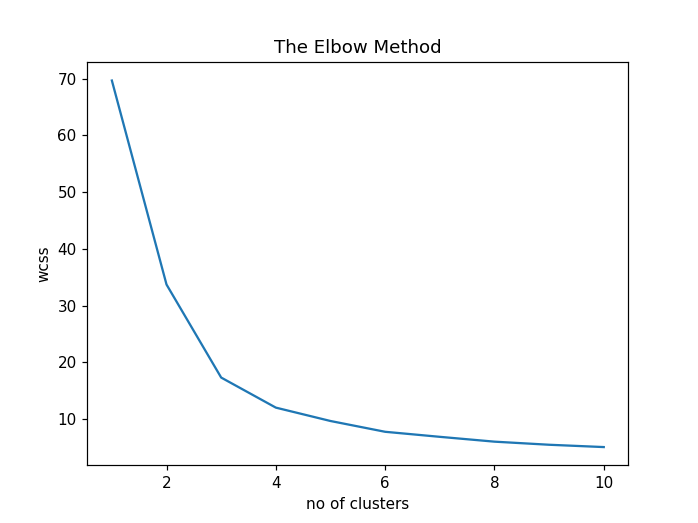

In [83]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [84]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([67.2, 88.5, 92.1, 94.6, 96.7, 97.5, 98. , 98.4, 98.7, 98.9, 99.1,
       99.2, 99.3, 99.4, 99.5, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6])

<IPython.core.display.Javascript object>


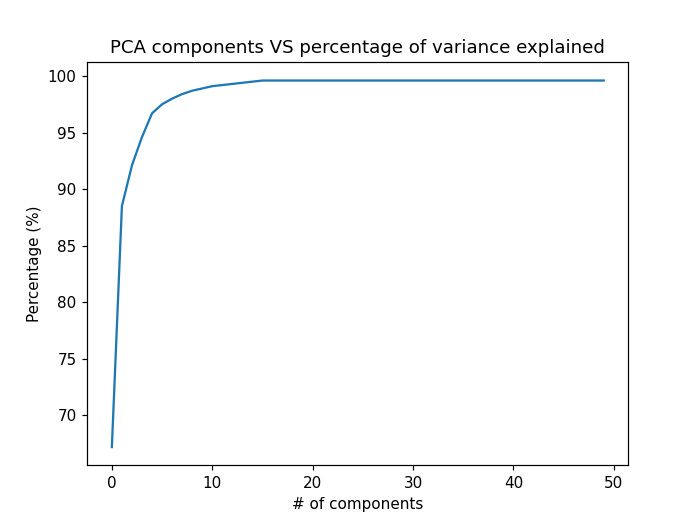

In [85]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [86]:
pca = PCA(n_components=3)
PCA = pca.fit_transform(X)

In [87]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [89]:
from sklearn import metrics
metrics.silhouette_score(X, PCA_labels, metric='l2')

0.5090014180674505

In [90]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = y_true
dfPCA.columns = ['x1','x2','x3','cluster', 'labels']
dfPCA

,x1,x2,x3,cluster,labels
0,-0.220573,-0.068836,0.015472,1,0
1,-0.008284,0.117735,-0.062829,3,2
2,0.157374,-0.030062,-0.001384,2,1
3,0.255286,-0.109591,-0.017606,4,3
4,-0.213060,-0.069085,0.019366,1,0
...,...,...,...,...,...
1720,0.184865,0.014434,0.019702,2,3
1721,-0.225245,-0.075887,-0.001288,1,0
1722,-0.065322,0.122206,-0.049039,3,2
1723,0.084617,0.100455,0.074730,0,4


In [91]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 80% representation", fontsize=10)

<IPython.core.display.Javascript object>

Text(0.5, 0.98, '2D PCA Predicted Clusters with 80% representation')

<IPython.core.display.Javascript object>


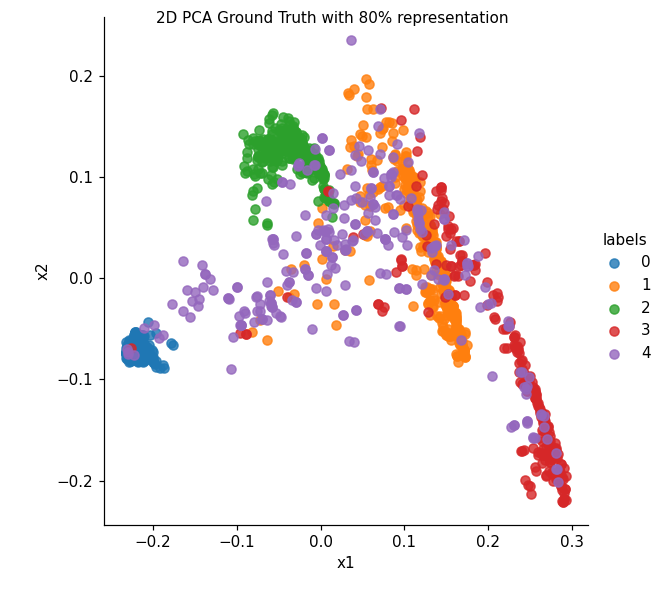

Text(0.5, 0.98, '2D PCA Ground Truth with 80% representation')

In [92]:
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 80% representation", fontsize=10)

In [93]:

dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA

,x1,x2,x3,cluster,labels
0,-0.220573,-0.068836,0.015472,1,m
1,-0.008284,0.117735,-0.062829,3,o
2,0.157374,-0.030062,-0.001384,2,p-o
3,0.255286,-0.109591,-0.017606,4,t
4,-0.213060,-0.069085,0.019366,1,m
...,...,...,...,...,...
1720,0.184865,0.014434,0.019702,2,t
1721,-0.225245,-0.075887,-0.001288,1,m
1722,-0.065322,0.122206,-0.049039,3,o
1723,0.084617,0.100455,0.074730,0,unknown


In [94]:
import plotly.express as px
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [95]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()

In [74]:
from sklearn.cluster import OPTICS
X_optics = dfPCA[['x1', 'x2', 'x3']]

# min_samples = list(range(50, 60))
# for i in min_samples:
    # print('min_samples is: ' + str(i))
    
clustering = OPTICS(min_samples=120).fit(X_optics)
labels_optics = clustering.labels_
dfPCA['labels_optics'] = labels_optics
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
n_noise_ = list(labels_optics).count(-1)
unique, counts = np.unique(labels_optics, return_counts=True)
print(dict(zip(unique, counts)))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_optics, labels_optics))


{-1: 803, 0: 386, 1: 206, 2: 330}
Estimated number of clusters: 3
Estimated number of noise points: 803
Silhouette Coefficient: 0.388


In [75]:
dfPCA_optics = dfPCA[['x1', 'x2', 'x3','labels_optics']]

fig = px.scatter_3d(
    dfPCA_optics, x='x1', y='x2', z='x3', color=dfPCA_optics['labels_optics'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction OPTICS'
)
fig.show()

In [ ]:
# Test 